# Промежуточная аттестация №1

Аттестационная работа состоит из двух заданий, которые проверяют ваши знания по основным темам, пройденным на лекциях в первом блоке.  
Для прохождения аттестации необходимо выполнить оба задания и загрузить результат на платформу в формате *.ipynb.

**Важно:** задания во многом творческие и не имеют единственно правильного решения!

### Задание 1:

**Описание:** Выберите интересный вам DataSet на https://www.kaggle.com/datasets (выгрузите его и приложите к решению ИЛИ включите в решение импорт DataSet-a из внешнего источника, который публично доступен без регистрации!). 

**Ограничение:** размер DataSet-а не более 10Mb.

Выполните следующие шаги:
1. Получение данных:
    - Напишите код для загрузки данных вашего DataSet-a
2. Предварительная обработка данных:
    - Преобразуйте данные в DataFrame.
    - Выполните очистку данных (удалите пропущенные значения, если есть). 
    - Добавьте новые вычисляемые атрибуты, если в них есть смысл.
3.   Вычисление статистик и показателей – от 3 до 5 по вашему DataSet-у исходя из предметной области.  
* Например, для коллекции фильмов это может быть:  
    - Количество фильмов по жанрам.
    - Средний рейтинг фильмов.
    - Фильмы с наивысшим рейтингом.
4. Визуализация данных – от 3 до 5 графиков по вашему DataSet-у исходя из предметной области. 
* Например, для коллекции фильмов это может быть:
    - Гистограмма количества фильмов по годам или жанрам. 
    - График распределения рейтингов фильмов.


### Задание 2:

Некоторые системы выстраивают схему данных в базе в несколько необычном формате:  
в одной таблице хранятся экземпяры сущностей, а в другой пары их атрибутов (название атрибута - значение атрибута).  
Такая модель хранения назвается EAV - Entity Atribute Value.

Будучи разработчиком системы вы можете не подозревать, какие подводные камни могут быть с этим связаны.

Рассмотрим простой пример, допустим у вас есть 2 таблиц в такой схеме хранения:
1) Таблица и базовой информацией о пользователях - users:

In [ ]:
create table users (
	id int primary key,
	full_name varchar(100)
);

insert into users (id, full_name) 
values (1, 'Иванов Иван'), 
       (2, 'Анина Анна'),
	   (3, 'Матвеев Матвей');

2) Таблица с атрибутами пользователей - users_meta:

In [ ]:
create table users_meta (
	id int primary key,
	user_id int references users(id),
	meta varchar(16),
	meta_value varchar(64)
);

insert into users_meta (id, user_id, meta, meta_value) 
values (1, 1, 'birth-date', '2000-01-02'),
	   (2, 1, 'phone-number', '89998887766'),
	   (3, 1, 'activity-flag', 'Y'),
	   (4, 1, 'register-date', '2025-02-04');
	   
insert into users_meta (id, user_id, meta, meta_value) 
values (5, 2, 'birth-date', '2002-06-12'),
	   (6, 2, 'activity-flag', 'N'),
	   (7, 2, 'register-date', '2023-01-23');
	   
insert into users_meta (id, user_id, meta, meta_value) 
values (8, 3, 'phone-number', '89998884455'),
	   (9, 3, 'activity-flag', 'Y'),
	   (10, 3, 'register-date', '2024-12-05');

В информационной системе для обращения к данным используется нотация, очень похожая на работу через ORM.  
Например, так выглядит запрос, который будет вытаскивать ID пользователей, для которых заполен хотябы один из атрибутов `birth-date`, `phone-number`, `activity-flag` или `register-date`:

In [ ]:
query = new User_Query( 
    array( 'meta_query' => array( 
        array( 'key' => 'birth-date' ),
        array( 'key' => 'phone-number'),
        array( 'key' => 'activity-flag' ),
        array( 'key' => 'register-date' ),
        'relation' => 'OR' ) ) );

При формировании запроса "под капотом" система преобразует это обращени в обычный SQL запрос вида:

In [ ]:
# исходный запрос
SELECT distinct users.id
FROM users 
	INNER JOIN users_meta AS mt1 ON ( users.ID = mt1.user_id )  
	INNER JOIN users_meta AS mt2 ON ( users.ID = mt2.user_id )  
	INNER JOIN users_meta AS mt3 ON ( users.ID = mt3.user_id )
	INNER JOIN users_meta AS mt4 ON ( users.ID = mt4.user_id )
WHERE 1=1 
AND (( mt1.meta = 'birth-date' AND mt1.meta_value != '' ) 
  OR ( mt2.meta = 'phone-number' AND mt2.meta_value != '' ) 
  OR ( mt3.meta = 'activity-flag' AND mt3.meta_value != '' )
  OR ( mt4.meta = 'register-date' AND mt4.meta_value != '' )
);

Ответьте на несколько вопросов:
* Видите ли вы какие-нибудь проблемы в этом запросе?
* В какой момент пользователи системы начнут испытывать дискомфорт при работе с информационной системой и почему?
* Что можно сделать?

Перепишите запрос так, чтобы исправить ситуацию ИЛИ внесите концептуальные предложения, которые помогут улучшить ситуацию.

c:\Users\Maks\Documents\Курс\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Maks\AppData\Local\Temp\ipykernel_3436\2463556189.py:24: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


     Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1               75.8      1800           485            800           0.79  
2               7

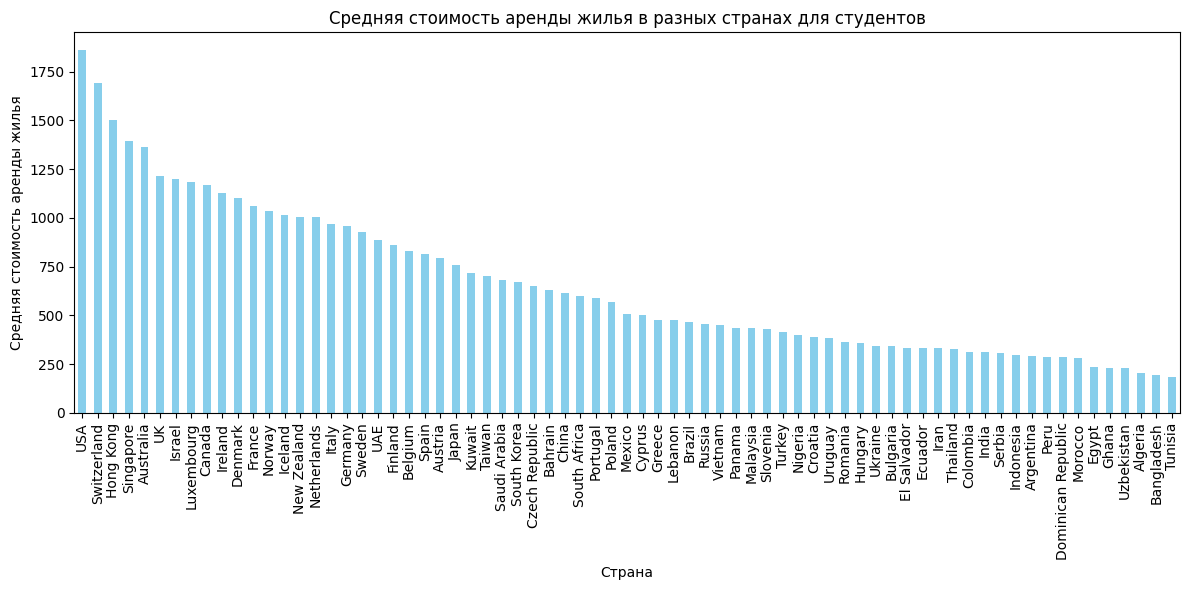

Был построен график средней стоимости жилья в разных странах. В результате было установлено, что самое дешевое жилье - в Тунисе, а самое дорогое - в США


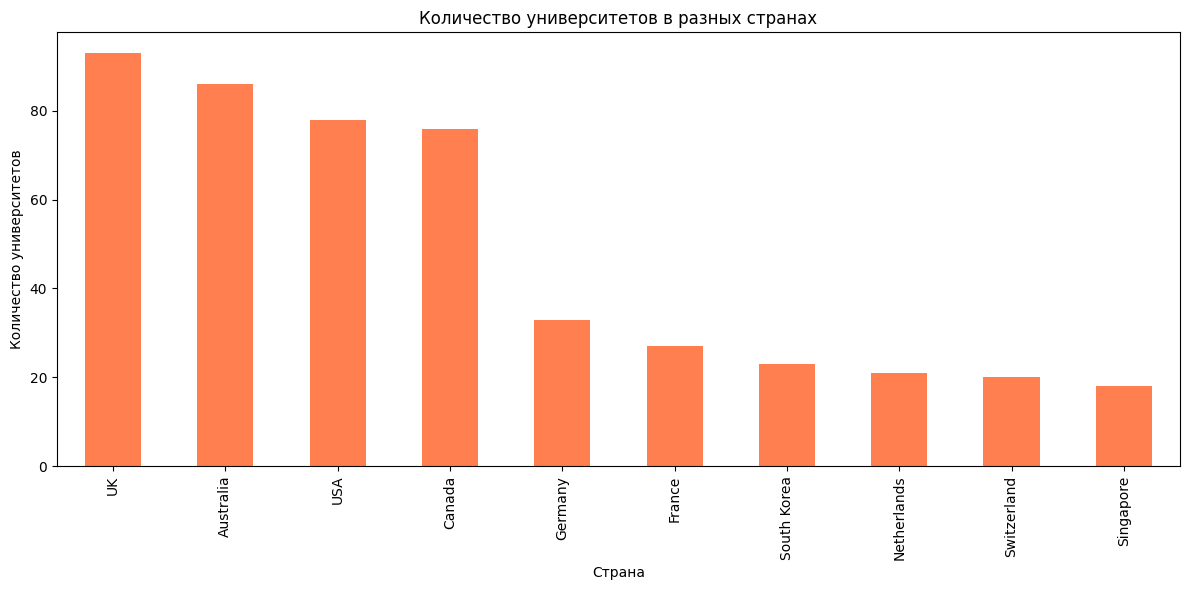

Был построен график количества университетов в разных странах. В результате установлено, самое большое количество университетов находится в Великобритании


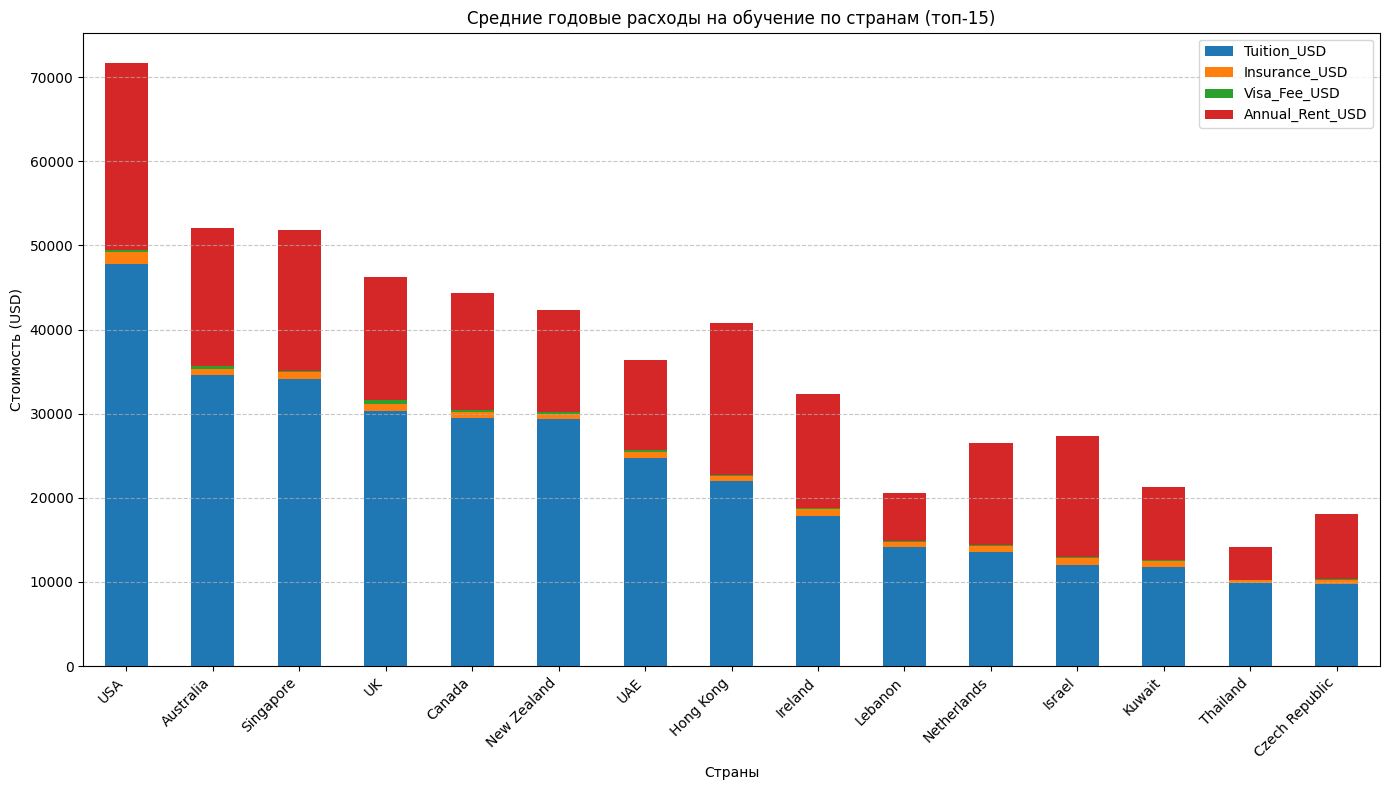

Был построен график, в котором показаны страны с самыми большими расходами на обучение. В результате выяснилось, что дороже всего получать высшее образование в США


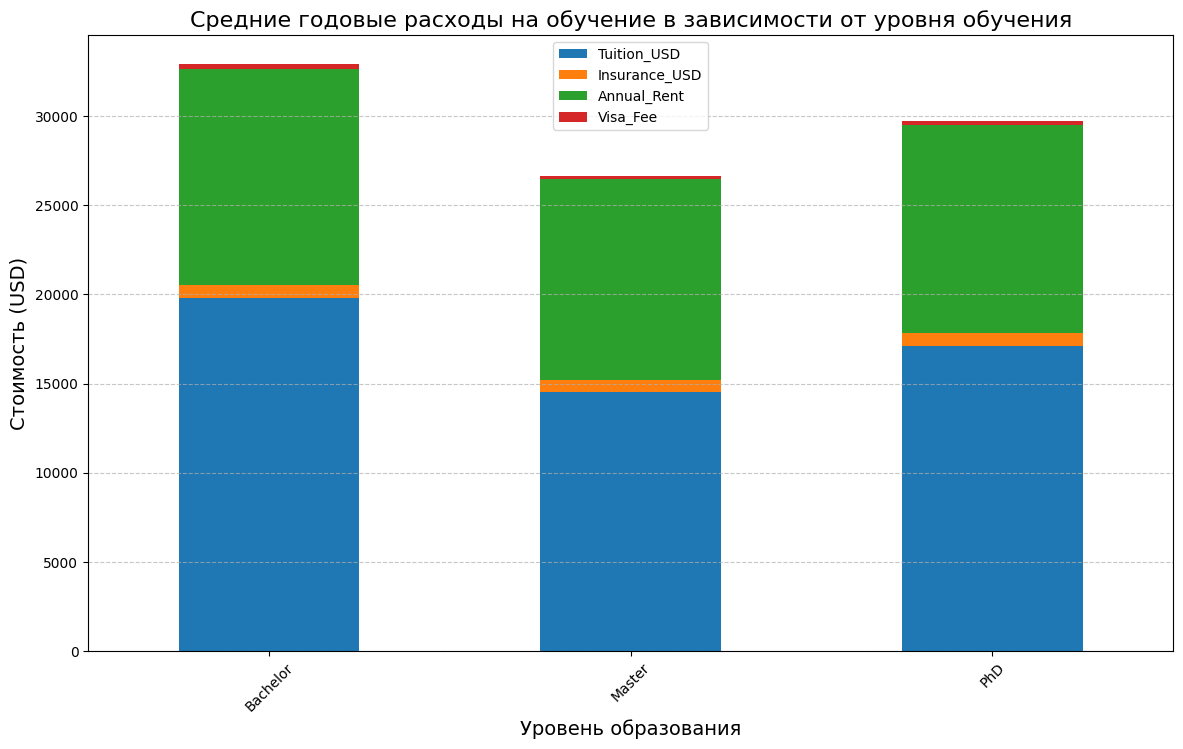

Построен график расходов на обучение в зависимости от уровня степени образование: бакалавриат, магистратура, докторантура. Выяснилось, что дешевле всего получить степень магистра, а самая дорогая - бакалавриат


In [ ]:
# Задание 1
# После него внизу будет Задание 2

import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Описание датасета: Стоимость международного образования
# Country - страна
# City - город
# University - университет
# Program - Конкретная специальность
# Level - уровень степени по специальности: бакалавриат, магистратура, докторантура
# Duration_Years - Продолжительность обучения в годах
# Tuition_USD - плата за обучение в долларах США
# Living_Cost_Index - индекс, отражающий повседневные расходы на проживание (питание, транспорт, коммунальные услуги)
# Rent_USD - ежемесячная арендная плата за проживание
# Visa_Fee_USD - единовременный сбор за оформление студенческой визы
# Insurance_USD - ежегодная медицинская страховка
# Exchange_Rate - курс обмена местной валюты на доллар США

# Загрузка данных
file_path = 'International_Education_Costs.csv'

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/cost-of-international-education",
  file_path
)

# Первые строки
print(df.head())

# Проверим есть ли пропущенные строки
print('\nКоличество пропущенных строк в столбцах:\n', df.isna().sum())

# Количество университетов в разных странах (топ-10)
universities_per_country = df['Country'].value_counts().head(10)

# Средняя стоимость аренды жилья в разных странах
avg_rent = df.groupby('Country')['Rent_USD'].mean().sort_values(ascending=False)

# Средние годовые расходы на обучение в разных странах (топ-15)
top_15_country_education = df.groupby('Country')[['Tuition_USD', 'Rent_USD', 'Insurance_USD', 'Visa_Fee_USD']].mean().sort_values('Tuition_USD', ascending=False).head(15)
top_15_country_education['Annual_Rent'] = top_15_country_education['Rent_USD'] * 12
top_15_country_education = top_15_country_education.drop('Rent_USD', axis=1)
top_15_country_education = top_15_country_education.rename(columns={'Annual_Rent': 'Annual_Rent_USD'})

# Средние годовые расходы на обучение в зависимости от уровня обучения
level_costs = df.groupby('Level')[['Tuition_USD', 'Insurance_USD']].mean()
level_costs['Annual_Rent'] = df.groupby('Level')['Rent_USD'].mean() * 12
level_costs['Visa_Fee'] = df.groupby('Level')['Visa_Fee_USD'].mean()

# Вывод статистик
print("\nКоличество университетов в разных странах (топ-10):\n", universities_per_country)
print("\nСредняя стоимость аренды жилья в разных странах:\n", avg_rent)
print("\nСредние годовые расходы на обучение в разных странах (топ-15):\n", top_15_country_education)
print('\nСредние годовые расходы на обучение в зависимости от уровня обучения:\n', level_costs)

# Визуализация данных
# Средняя стоимость аренды жилья в разных странах для студентов
plt.figure(figsize=(12, 6))
avg_rent.plot(kind="bar", color="skyblue")
plt.title("Средняя стоимость аренды жилья в разных странах для студентов")
plt.ylabel("Средняя стоимость аренды жилья")
plt.xlabel("Страна")
plt.tight_layout()
plt.show()

# Вывод
print('Был построен график средней стоимости жилья в разных странах. В результате было установлено, ' \
'что самое дешевое жилье - в Тунисе, а самое дорогое - в США')

# Количество университетов в разных странах
plt.figure(figsize=(12, 6))
universities_per_country.plot(kind="bar", color="coral")
plt.title("Количество университетов в разных странах")
plt.ylabel("Количество университетов")
plt.xlabel("Страна")
plt.tight_layout()
plt.show()

# Вывод
print('Был построен график количества университетов в разных странах. В результате установлено, ' \
'самое большое количество университетов находится в Великобритании')


# universities_per_country.plot(kind="pie", autopct='%1.1f%%', startangle=140, subplots=True, figsize=(14, 8))
# plt.title("Количество университетов по странам")
# plt.ylabel("")
# plt.tight_layout()
# plt.show()

# Топ-15 стран с самым дорогим обучением за год
top_15_country_education.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Средние годовые расходы на обучение по странам (топ-15)')
plt.xlabel('Страны')
plt.ylabel('Стоимость (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Вывод
print('Был построен график, в котором показаны страны с самыми большими расходами на обучение. В результате ' \
'выяснилось, что дороже всего получать высшее образование в США')

# Средние годовые расходы на обучение в зависимости от уровня обучения
level_costs.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Средние годовые расходы на обучение в зависимости от уровня обучения', fontsize=16)
plt.xlabel('Уровень образования', fontsize=14)
plt.ylabel('Стоимость (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Вывод
print('Построен график расходов на обучение в зависимости от уровня степени образование: бакалавриат, ' \
'магистратура, докторантура. Выяснилось, что дешевле всего получить степень магистра, а самая дорогая - бакалавриат')

In [ ]:
# Задание 2

# исходный запрос
SELECT distinct users.id
FROM users 
	INNER JOIN users_meta AS mt1 ON ( users.ID = mt1.user_id )  
	INNER JOIN users_meta AS mt2 ON ( users.ID = mt2.user_id )  
	INNER JOIN users_meta AS mt3 ON ( users.ID = mt3.user_id )
	INNER JOIN users_meta AS mt4 ON ( users.ID = mt4.user_id )
WHERE 1=1 
AND (( mt1.meta = 'birth-date' AND mt1.meta_value != '' ) 
  OR ( mt2.meta = 'phone-number' AND mt2.meta_value != '' ) 
  OR ( mt3.meta = 'activity-flag' AND mt3.meta_value != '' )
  OR ( mt4.meta = 'register-date' AND mt4.meta_value != '' )
);

1. Происходит одно и то же объединение таблиц четыре раза, только с разными псевдонимами, в результате чего
увеличивается нагрузка на БД
2. С увеличением количества атрибутов в исходной нотации, в SQL запросе будет увеличиваться количество строк с JOIN,
которые будут производить одно и то же объединение таблиц с разными псевдонимами, что негативно скажется на производительности
3. Оставить только одну строку с INNER JOIN


SELECT distinct users.id
FROM users 
	INNER JOIN users_meta AS mt ON ( users.ID = mt.user_id )
WHERE 1=1 
AND (( mt.meta = 'birth-date' AND mt.meta_value != '' ) 
  OR ( mt.meta = 'phone-number' AND mt.meta_value != '' ) 
  OR ( mt.meta = 'activity-flag' AND mt.meta_value != '' )
  OR ( mt.meta = 'register-date' AND mt.meta_value != '' )
);